#1 - Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


#2 - Database

In [ ]:
db=pd.read_csv("caschool.csv")

In [ ]:
db

,observation_number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,416,68957,San Mateo,Las Lomitas Elementary,KK-08,984,59.730000,0.101600,3.556900,195,704.300049,0.198171,7290.338867,16.474134,28.716999,5.995935,700.900024,707.700012
416,417,69518,Santa Clara,Los Altos Elementary,KK-08,3724,208.479996,1.074100,1.503800,721,706.750000,0.193609,5741.462891,17.862625,41.734108,4.726101,704.000000,709.500000
417,418,72611,Ventura,Somis Union Elementary,KK-08,441,20.150000,3.563500,37.193802,45,645.000000,0.102041,4402.831543,21.885857,23.733000,24.263039,648.299988,641.700012
418,419,72744,Yuba,Plumas Elementary,KK-08,101,5.000000,11.881200,59.405899,14,672.200012,0.138614,4776.336426,20.200001,9.952000,2.970297,667.900024,676.500000


#3 - Graphs

## 1 - Simple Regresion

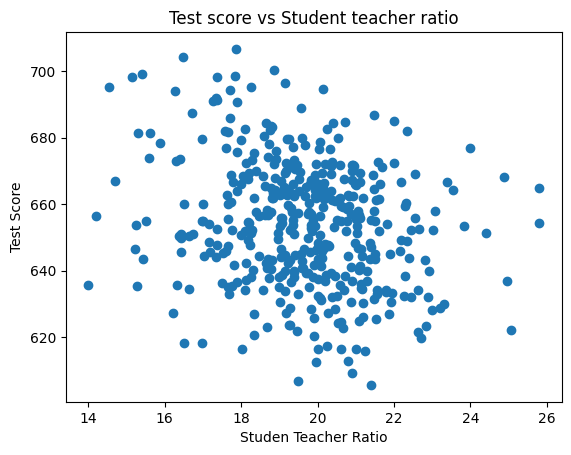

In [ ]:
plt.scatter(db.str, db.testscr)
plt.title("Test score vs Student teacher ratio")
plt.xlabel("Studen Teacher Ratio")
plt.ylabel("Test Score")
plt.show()

1) Test Score = f(Student / teacher)

TS=a+b*STR+ Epsillon (Residual)

Dependent


Explanatory STR


Residual

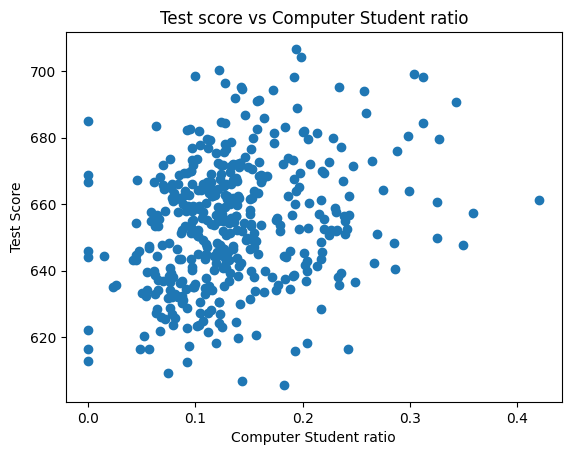

In [ ]:
plt.scatter(db.comp_stu, db.testscr)
plt.title("Test score vs Computer Student ratio")
plt.xlabel("Computer Student ratio")
plt.ylabel("Test Score")
plt.show()

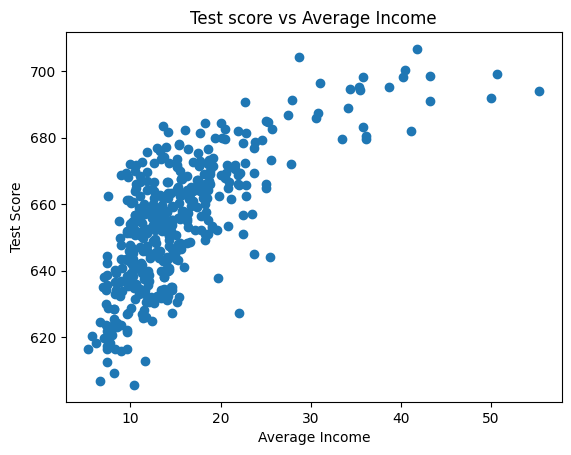

In [ ]:
plt.scatter(db.avginc, db.testscr)
plt.title("Test score vs Average Income")
plt.xlabel("Average Income")
plt.ylabel("Test Score")
plt.show()

ols = ordinary less squares

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
reg1=ols("testscr ~ str",data=db).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.58
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           2.78e-06
Time:                        23:12:31   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    698.9330      9.467     73.825      0.0

Increasing the student teacher ratio causes the decrease on students test score for 2.27 units

P-value <= 0.05


my result is statisthically strong


R^2 as high as possible the better

In [ ]:
reg2=ols("testscr ~ comp_stu",data=db).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     33.05
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           1.73e-08
Time:                        23:12:31   Log-Likelihood:                -1817.3
No. Observations:                 420   AIC:                             3639.
Df Residuals:                     418   BIC:                             3647.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    643.3633      2.080    309.275      0.0

For each computer added per student the average student score gets 79 points higher however this sample is just caught by the 7.3% of the avaliable information.

In [ ]:
reg3=ols("testscr ~ avginc",data=db).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     430.8
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           2.75e-66
Time:                        23:12:31   Log-Likelihood:                -1684.5
No. Observations:                 420   AIC:                             3373.
Df Residuals:                     418   BIC:                             3381.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    625.3836      1.532    408.106      0.0

If the income of the students gets one point higher the test score results increases by 1.87 points. It's also using more than 50% of the sample

##2 - Multiple Regression

In [ ]:
reg4=ols("testscr ~ comp_stu + avginc",data=db).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     231.0
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           2.93e-68
Time:                        23:12:31   Log-Likelihood:                -1676.7
No. Observations:                 420   AIC:                             3359.
Df Residuals:                     417   BIC:                             3371.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    620.9952      1.865    332.961      0.0

lin - lin
1x - 1x

log - log
1 % - 1 %

lin - log
1 x - 1%

log - lin
1% - 1 x